In [1]:
import pandas as pd                  # Para trabajar con datos
import numpy as np                   # Para cosas de álgebra lineal
import matplotlib.pyplot as plt      # Para gráficos
import seaborn as sns                # Para gráficos lindos :^)
sns.set_style("darkgrid")
from sklearn import linear_model     # Para CML
import random

import warnings
warnings.filterwarnings('ignore')  # Cállese, hombre horrible!

# Predicción con Cuadrados Mínimos Lineales
### Visualización

In [2]:
# Levanto los datos

# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
df = pd.read_csv('datos.csv')

print("Las primeras 8 filas de los datos:", df.head(8), sep="\n\n")

Las primeras 8 filas de los datos:

   x          y
0  0  19.184917
1  1  24.238282
2  2  25.516969
3  3  21.132415
4  4  18.515618
5  5  16.674168
6  6  21.679375
7  7  73.866501


In [3]:
print("Decripción de los datos:", df.describe(), sep="\n\n")

Decripción de los datos:

               x          y
count  60.000000  60.000000
mean   29.500000  28.975082
std    17.464249  13.771049
min     0.000000 -16.997848
25%    14.750000  23.874282
50%    29.500000  28.227643
75%    44.250000  33.404901
max    59.000000  73.866501


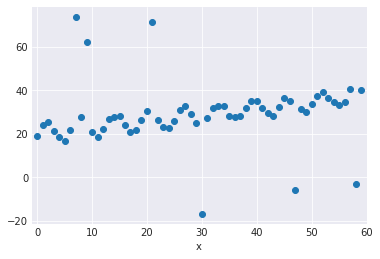

In [4]:
# Grafico los datos

# http://seaborn.pydata.org/generated/seaborn.tsplot.html
ax = sns.tsplot(time=df['x'], data=df['y'], interpolate=False)
plt.show()

### Limpieza

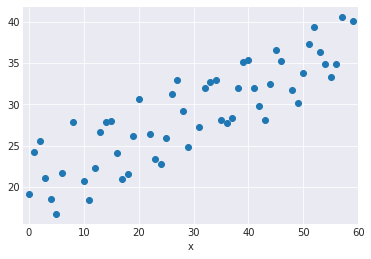

In [5]:
# Limpio los outliers

def mascara_de_no_outliers(s):
    not_outliers = abs(s - s.mean()) <= 2*s.std()
    return not_outliers

mascara = mascara_de_no_outliers(df['y'])
# Me quedo solo con las filas que que no son outliers
df = df[mascara]
sns.tsplot(time=df['x'], data=df['y'], interpolate=False)
plt.show()

### Predicción

In [6]:
# Graficos los datos reales para tenerlos como referencia
sns.tsplot(time=df['x'], data=df['y'], interpolate=False)

def armar_matriz_A(s):
    temp = []
    for t in s:
        temp.append([t])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion):
    # http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    regr = linear_model.LinearRegression(fit_intercept=False)

    ## Entreno el modelo
    
    # Armo la matriz A de features
    df_entrenamiento = df[df['x'].isin(rango_entrenamiento)]
    A = armar_matriz_A(df_entrenamiento['x'])
    
    # 'Fiteo' los datos de entrenamiento
    regr.fit(A, df_entrenamiento['y'])
    
    # Grafico la aproximacion
    df_entrenamiento['pred'] = regr.predict(A)
    sns.tsplot(time=df_entrenamiento['x'], data=df_entrenamiento['pred'], color='red')

    ## Realizo predicciones
    
    # Armo la matriz A de features
    df_prediccion = df[df['x'].isin(rango_prediccion)]
    A = armar_matriz_A(df_prediccion['x'])
    
    # Predigo los datos de testeo
    df_prediccion['pred'] = regr.predict(A)
    
    # Grafico la prediccion
    sns.tsplot(time=df_prediccion['x'], data=df_prediccion['pred'], color='green')

    ## Calculo el Error Cuadrático Medio
    ECM = sum((df_prediccion['pred'] - df_prediccion['y'])**2) / df_prediccion.shape[0]
    return ECM

def predecir(k):
    rango_entrenamiento = list(range(k-30,k))
    rango_prediccion = list(range(k,k+10))
    return entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion)



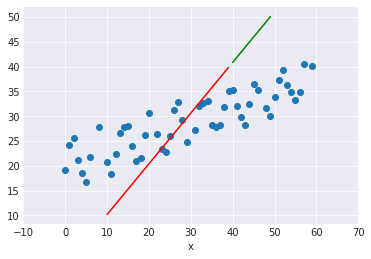

In [7]:
predecir(40)
 
plt.xlim((-10,70))
plt.show()

### Validación

Error de predicción: 180.79
Error de predicción: 78.53
Error de predicción: 219.01


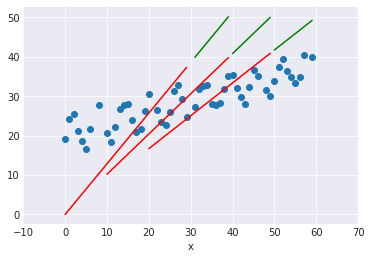

In [8]:
sns.tsplot(time=df['x'], data=df['y'], interpolate=False)

ECM = predecir(40)
print("Error de predicción: {:.2f}".format(ECM))
ECM = predecir(50)
print("Error de predicción: {:.2f}".format(ECM))
ECM = predecir(30)
print("Error de predicción: {:.2f}".format(ECM))
    
plt.xlim((-10,70))
plt.show()

### Qué errores hice?







































* Cómo filtro los outliers?
* Está bien cómo calculo el ECM?
* Qué le falta a los gráficos?

### Consideraciones a tener en cuenta durante el TP
* Quiero predecir comportamientos particulares o generales?
* Cuánto tiempo uso para entrenar? Cuánto tiempo quiero predecir?
* Qué familias elijo? Por qué las elijo?
* Qué métrica utilizo para comparar distintas familias?
* Mi eje `x` tiene que ser tiempo sí o sí?
* Tengo que limitarme a usar ***una*** dimensión para predecir? Puedo tener eje `x`, eje `y` y querer predecir eje `z`?

# Extra de Pandas

In [9]:
years = [2004]*6 + [2005]*6 + [2006]*6
delays = list(np.random.randn(6)+80) + list(np.random.randn(6)+5) + list(np.random.randn(6)+50)
delays[2] = 5
delays[7] = 80

df1 = pd.DataFrame({
    'year': years,
    'delay': delays
})

df1

,delay,year
0,79.998326,2004
1,78.970055,2004
2,5.000000,2004
3,80.503653,2004
4,80.486707,2004
5,80.428914,2004
6,5.410119,2005
7,80.000000,2005
8,3.827789,2005
9,4.645427,2005


In [10]:
for idx, group in df1.groupby('year'):
    print("Indice:", idx)
    print("Grupo:", group, sep="\n", end="\n\n#########\n\n")

Indice: 2004
Grupo:
       delay  year
0  79.998326  2004
1  78.970055  2004
2   5.000000  2004
3  80.503653  2004
4  80.486707  2004
5  80.428914  2004

#########

Indice: 2005
Grupo:
        delay  year
6    5.410119  2005
7   80.000000  2005
8    3.827789  2005
9    4.645427  2005
10   2.886267  2005
11   6.213743  2005

#########

Indice: 2006
Grupo:
        delay  year
12  50.665478  2006
13  49.432616  2006
14  49.912136  2006
15  49.708708  2006
16  49.549956  2006
17  51.017116  2006

#########



In [11]:
# Groupby y sacar outliers

mascara = df1.groupby('year')['delay'].apply(mascara_de_no_outliers)
df1 = df1[mascara]
df1

,delay,year
0,79.998326,2004
1,78.970055,2004
3,80.503653,2004
4,80.486707,2004
5,80.428914,2004
6,5.410119,2005
8,3.827789,2005
9,4.645427,2005
10,2.886267,2005
11,6.213743,2005


In [12]:
# Groupby y calcular promedio

promedio = df1.groupby('year').aggregate(['mean', 'std', 'count'])
promedio

delay                
           mean       std count
year                           
2004  80.077531  0.652927     5
2005   4.596669  1.303424     5
2006  50.047668  0.645103     6